In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
# Download the NLTK stopwords if you don't have them
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aguch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aguch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
# Load the Sentiment140 dataset (replace with your file path)
file_path = r"C:\Users\aguch\Downloads\archive\training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None, names=["polarity", "id", "date", "query", "user", "text"])

In [5]:
# Preprocessing the text data
def clean_text(text):
    # Remove URLs, mentions, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) 
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = text.lower()  
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [6]:
# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

In [7]:
# Prepare the data for training
X = df['cleaned_text']
y = df['polarity'].map({0: 0, 2: 1, 4: 2})  # Convert polarity to 3 classes: 0 (negative), 1 (neutral), 2 (positive)

In [8]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Vectorize the text using Tfidf
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [13]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'], labels=[0, 1, 2]))


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_cla


Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.76      0.77    159494
     Neutral       0.00      0.00      0.00         0
    Positive       0.77      0.80      0.78    160506

   micro avg       0.78      0.78      0.78    320000
   macro avg       0.52      0.52      0.52    320000
weighted avg       0.78      0.78      0.78    320000



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.778715625


In [17]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

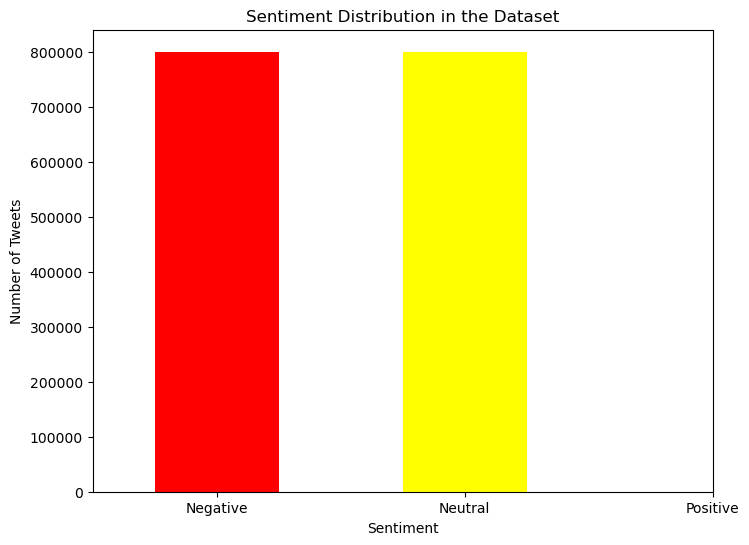

In [22]:
# Sentiment Distribution in the Dataset
plt.figure(figsize=(8, 6))
df['polarity'].value_counts().sort_index().plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Sentiment Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()

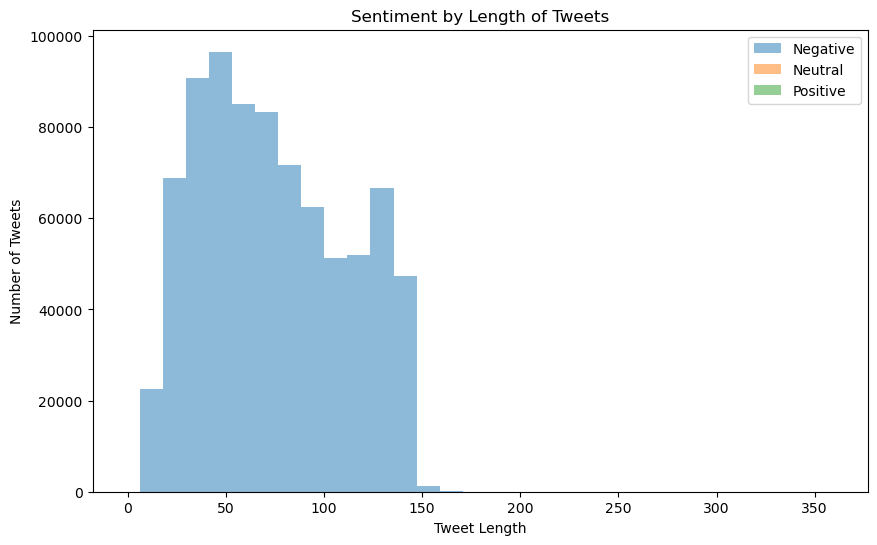

In [21]:
# Sentiment Distribution by Tweet Length (Histogram)
df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
for sentiment in [0, 1, 2]:
    subset = df[df['polarity'] == sentiment]
    plt.hist(subset['tweet_length'], bins=30, alpha=0.5, label=['Negative', 'Neutral', 'Positive'][sentiment])
plt.title('Sentiment by Length of Tweets')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper right')
plt.show()

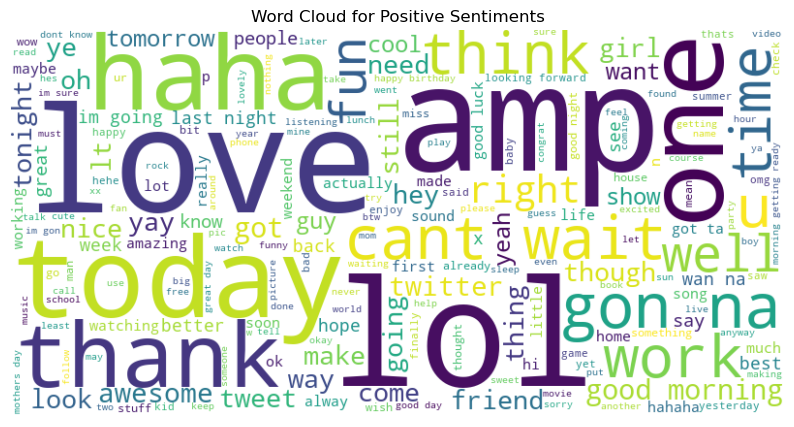

In [23]:
# Word Cloud for Positive Sentiments
positive_tweets = df[df['polarity'] == 4]['cleaned_text']
positive_text = ' '.join(positive_tweets)
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')
plt.show()

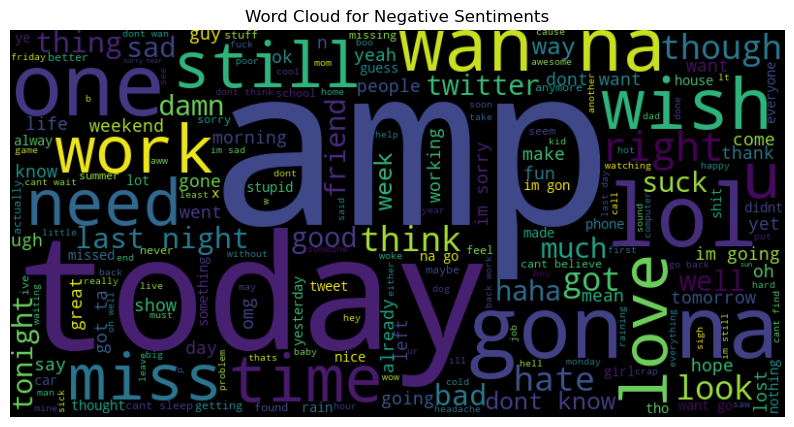

In [24]:
# Word Cloud for Negative Sentiments
negative_tweets = df[df['polarity'] == 0]['cleaned_text']
negative_text = ' '.join(negative_tweets)
negative_wc = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')
plt.show()